# Image Pixel Colour Clustering

I found an idea for this on the web somewhere and decided to reproduce the problem on one of my photos. It is an interesting illustration of unsurpervised clustering as it performs a clustering analysis on the pixel colours of an imported image.

The number of k clusters is chosen (arbitrarily in this case) and the pixels are clustered in k groups according to their 3D colour vectors. As the pixels are classed as part of an appropriate colour cluster, the cluster centroid colour is then reapplied to the pixels belonging to that cluster. The image is replotted with new colours according to the cluster colours.

In [1]:
# Load common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
from sklearn.cluster import KMeans

## Image Preprocessing

Import the image and plot it.

In [3]:
image_name = 'data/Uganda-160.JPG'

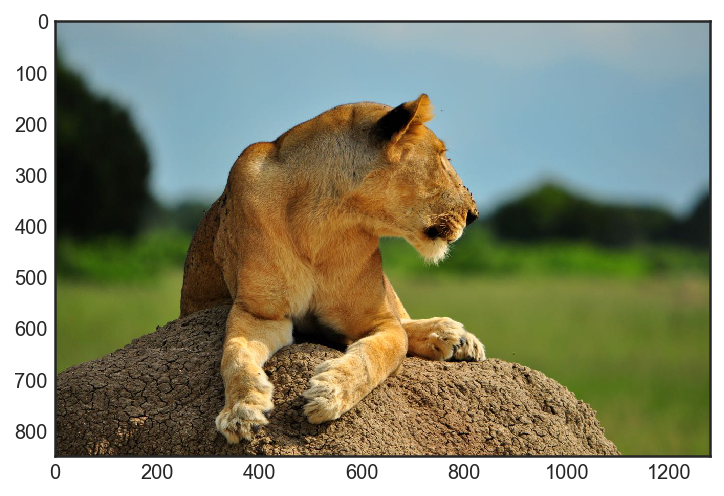

In [4]:
image = plt.imread(image_name)
plt.imshow(image);

Check the shape of the image and the pixel data.

In [5]:
image[0][0]

array([131, 156, 163], dtype=uint8)

In [6]:
image.shape

(850, 1280, 3)

Flatten the image to an array that contains a 3 item array for each pixel.

In [7]:
pixels = np.array([pixel for row in image for pixel in row])
pixels.shape

(1088000, 3)

In [8]:
pixels[0:5]

array([[131, 156, 163],
       [131, 156, 163],
       [131, 156, 163],
       [131, 156, 163],
       [131, 156, 163]], dtype=uint8)

In [9]:
pixels[0]

array([131, 156, 163], dtype=uint8)

## Generate Cluster Centroids

Fit the KMeans to 5 clusters. Extract the cluster centers.

In [10]:
clusterer = KMeans(5, n_jobs=-1)

In [11]:
clusterer.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
cluster_centers = clusterer.cluster_centers_
cluster_centers

array([[139.0661369 , 175.00334821, 189.47486012],
       [137.32836127, 116.26899195,  54.04537897],
       [ 31.89357911,  30.45666938,  16.08760055],
       [205.95910293, 170.83121546, 115.35136284],
       [ 86.38485568,  89.50165023,  36.56528411]])

Predict (or label) the cluster that each pixel will belong to and associate the new image array with the new pixel cluster centroids.

In [13]:
cluster_label = clusterer.predict(pixels)

cluster_label[10]

0

In [14]:
recoloured_pixels = cluster_centers[cluster_label]

## Recolour and Display the Image

Process the new image data. Reshape the pixel array to match the image shape. Reset the data type to 255 colours (uint8).

In [15]:
recoloured_image = recoloured_pixels.reshape(image.shape)

In [16]:
recoloured_image.dtype

dtype('float64')

In [17]:
recoloured_image = recoloured_image.astype('uint8')

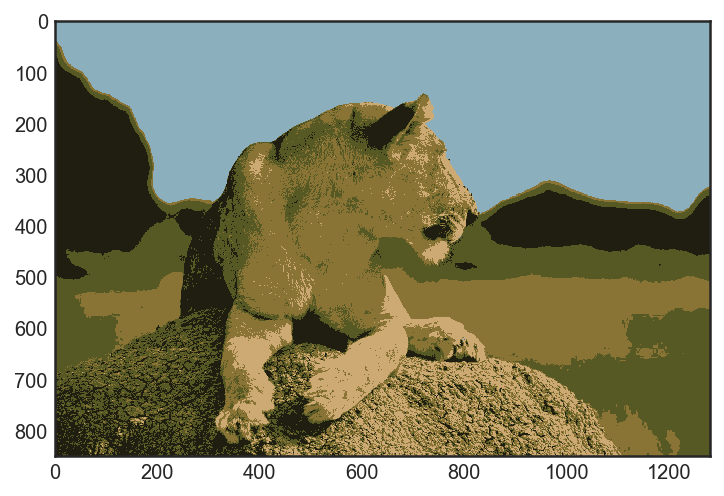

In [18]:
plt.imshow(recoloured_image);